In [1]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd
import geopandas as gpd
import geoplot as gplt

import geoplot.crs as gcrs

location_key = 'id'

pd.set_option('max_columns', 6)

eqs_data = gpd.read_file('../data/raw_geojson.json')
map_data = gpd.read_file('../data/nepal-wards.geojson')

# filter out null and irrelevant values
nepal_data = eqs_data.query("place.str.contains('Nepal') & mag > 3", engine='python')
nepal_map_data = map_data[map_data[location_key].notnull()]
# nepal_map_data = map_data[~map_data['NAME'].str.contains('Park')]

<GeoAxesSubplot:>

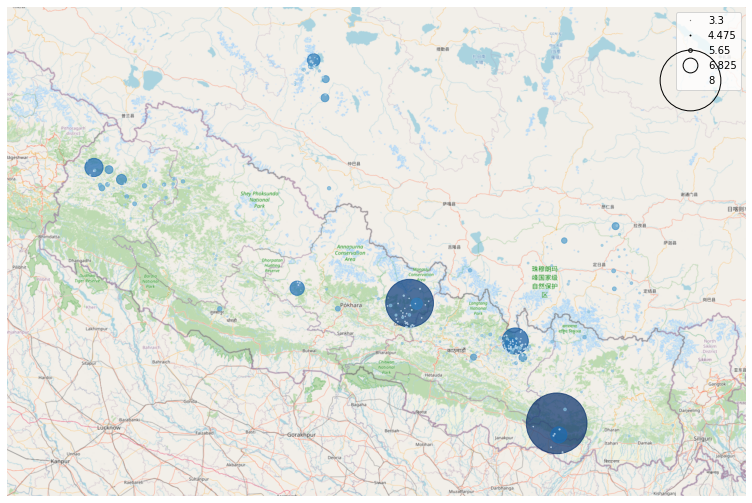

In [4]:
def log_scale(minval, maxval):
    return lambda val: 3.33**(val-minval)/(maxval-minval)

ax = gplt.webmap(map_data, projection=gcrs.WebMercator(), figsize=(14,9))

# ax = gplt.polyplot(map_data, projection=gcrs.AlbersEqualArea(), 
#     figsize=(14,9), edgecolor='white', facecolor='lightgray')

gplt.pointplot(nepal_data,hue='mag', scale='mag',
    scale_func=log_scale, limits=(0,8),
    ax=ax, alpha = 0.7, cmap='Blues',
    legend=True, legend_var='scale'
    )

In [5]:
data_to_process = nepal_map_data.copy()
eqs_intensity = [1 for _ in nepal_map_data.iterrows()]

for idx, (mag, point) in nepal_data[['mag','geometry']].iterrows():
    print(idx,end='\r')
    for jdx, polygon in data_to_process[['geometry']].iterrows():
        if polygon['geometry'].contains(point):
            eqs_intensity[jdx]+=mag

data_to_process['intensities'] = eqs_intensity


<GeoAxesSubplot:>

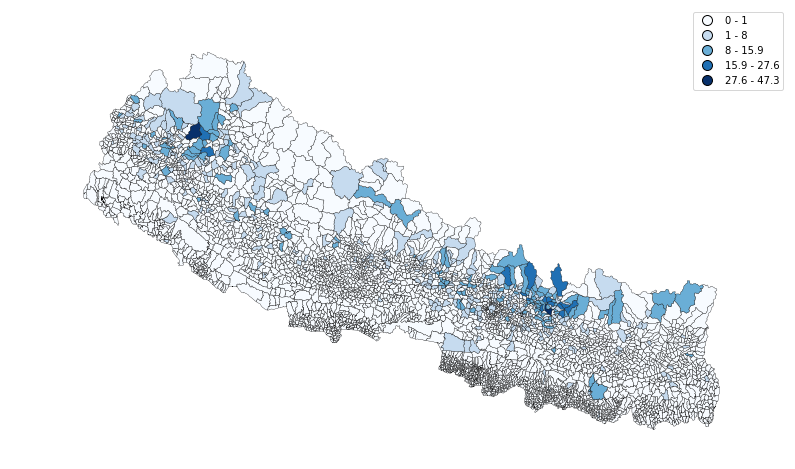

In [9]:
gplt.choropleth(
    data_to_process, hue='intensities', projection=gcrs.AlbersEqualArea(),
     linewidth=0.3, edgecolor='#6f8ead', figsize=(14,9),
    cmap='Blues', legend=True,
    scheme='FisherJenks'
)

In [ ]:
# cartogram of nepal by population